<a href="https://colab.research.google.com/github/harshvardhan176/ML_LAB_01/blob/main/ML_Lab_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('Wmunu.csv')
feature = ['pt', 'eta', 'phi', 'chiSq', 'dxy', 'iso', 'MET', 'phiMET']

class1 = df[df['Q'] == 1][feature]
class2 = df[df['Q'] == -1][feature]

centroid1 = class1.mean(axis=0)
centroid2 = class2.mean(axis=0)

spread1 = class1.std(axis=0)
spread2 = class2.std(axis=0)

interclass_distance = np.linalg.norm(centroid1 - centroid2)

print("Centroid for Class Q=1:\n", centroid1)
print("\nSpread (Standard Deviation) for Class Q=1:\n", spread1)
print("\nCentroid for Class Q=-1:\n", centroid2)
print("\nSpread (Standard Deviation) for Class Q=-1:\n", spread2)
print("\nInterclass Distance (Euclidean Distance between Centroids):", interclass_distance)


Centroid for Class Q=1:
 pt        37.750806
eta        0.002215
phi        0.016800
chiSq      7.124438
dxy       -0.021699
iso       15.825361
MET       27.615376
phiMET    -0.129915
dtype: float64

Spread (Standard Deviation) for Class Q=1:
 pt         21.250451
eta         1.096368
phi         1.815462
chiSq      69.865090
dxy         2.429867
iso       133.736679
MET        16.832410
phiMET      1.759957
dtype: float64

Centroid for Class Q=-1:
 pt        40.923765
eta       -0.008081
phi        0.002537
chiSq      7.649334
dxy       -0.012763
iso       17.666431
MET       26.374916
phiMET    -0.122547
dtype: float64

Spread (Standard Deviation) for Class Q=-1:
 pt        307.963578
eta         1.063404
phi         1.817691
chiSq      78.381170
dxy         3.294237
iso        36.766256
MET        16.383725
phiMET      1.760690
dtype: float64

Interclass Distance (Euclidean Distance between Centroids): 3.9079292658621507


Mean of 'pt': 38.839341684000004
Variance of 'pt': 44301.76543281126


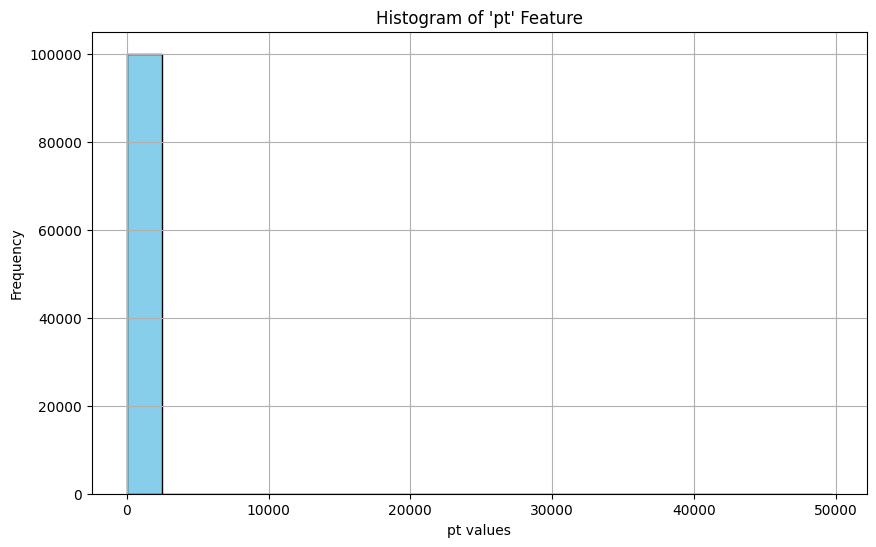

In [4]:
df = pd.read_csv('Wmunu.csv')
feature = 'pt'
data = df[feature]

hist_counts, bin_edges = np.histogram(data, bins=20)
mean_value = np.mean(data)
variance_value = np.var(data)

print(f"Mean of '{feature}': {mean_value}")
print(f"Variance of '{feature}': {variance_value}")
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, color='skyblue', edgecolor='black')
plt.title(f"Histogram of '{feature}' Feature")
plt.xlabel(f"{feature} values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

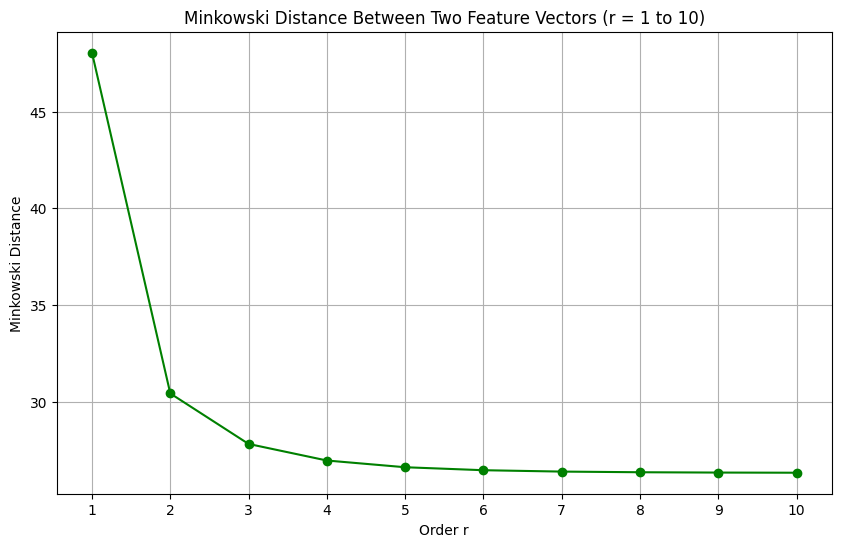

In [5]:
df = pd.read_csv('Wmunu.csv')

features = ['pt', 'eta', 'phi', 'chiSq', 'dxy', 'iso', 'MET', 'phiMET']
vec1 = df.iloc[0][features].values
vec2 = df.iloc[1][features].values

r_values = range(1, 11)
minkowski_distances = [np.linalg.norm(vec1 - vec2, ord=r) for r in r_values]

plt.figure(figsize=(10, 6))
plt.plot(r_values, minkowski_distances, marker='o', linestyle='-', color='green')
plt.title("Minkowski Distance Between Two Feature Vectors (r = 1 to 10)")
plt.xlabel("Order r")
plt.ylabel("Minkowski Distance")
plt.grid(True)
plt.xticks(r_values)
plt.show()

In [8]:
df = pd.read_csv('Wmunu.csv')

features = ['pt', 'eta', 'phi', 'chiSq', 'dxy', 'iso', 'MET', 'phiMET']
X = df[features]
y = df['Q']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (70000, 8)
Testing Features Shape: (30000, 8)
Training Labels Shape: (70000,)
Testing Labels Shape: (30000,)


In [12]:
df = pd.read_csv('Wmunu.csv')
features = ['pt', 'eta', 'phi', 'chiSq', 'dxy', 'iso', 'MET', 'phiMET']
X = df[features]
y = df['Q']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy of kNN (k=3): {accuracy:.4f}")
print("\nClassification Report:")
print(report)

Accuracy of kNN (k=3): 0.5096

Classification Report:
              precision    recall  f1-score   support

          -1       0.45      0.43      0.44     13483
           1       0.55      0.57      0.56     16517

    accuracy                           0.51     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.51      0.51      0.51     30000

